In [20]:
import numpy as np
import math

import matplotlib.pyplot as plt
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image

from scipy.ndimage.measurements import center_of_mass

import pandas as pd
from tensorflow import keras
import tensorflow as tf 
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

import cv2

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18724\2990399582.py:10: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.measurements import center_of_mass


In [21]:
path = "mnist.npz"


def load_dataset():
    with np.load(path) as f:
        x_train = f['x_train']
        # x_test = f['x_test']
        y_train = f['y_train']
        # y_test = f['y_test']
        return x_train, y_train

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(load_dataset()[0], load_dataset()[1], test_size=0.2,random_state=42)


In [23]:
x_train_flat = X_train.reshape(-1, 28*28).astype(float)
x_test_flat = X_test.reshape(-1, 28*28).astype(float)
x_train_float = x_train_flat.astype(float) /255 - 0.5
x_test_float = x_test_flat.astype(float)/ 255 - 0.5


In [24]:
Y_train[0]

5

In [25]:
Y_train_oh = keras.utils.to_categorical(Y_train, 10)
y_test_oh = keras.utils.to_categorical(Y_test, 10)

In [26]:
keras.backend.clear_session()

In [27]:
model = models.Sequential()
# input_shape=(x_train_float.shape[1],)
model.add(layers.InputLayer(shape=(x_train_float.shape[1], )))
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dense(256, activation= 'relu'))
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dense(10, activation= 'sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 290,122 (1.11 MB)

 Trainable params: 290,122 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [29]:
reduce_lr = ReduceLROnPlateau(monitor ='val_loss', factor = 0.1, patience = 5, min_lr = 0.01)
early_stopping = EarlyStopping(monitor ='val_loss', patience = 5, restore_best_weights= True)


In [30]:
print(Y_train.shape, x_train_float.shape)

(48000,) (48000, 784)


In [31]:
history = model.fit(
    x_train_float,
    Y_train_oh,
    epochs=6,
    batch_size=64,
    validation_data = (x_test_float, y_test_oh)
    # callbacks = [reduce_lr, early_stopping]    
)

Epoch 1/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8083 - loss: 0.5965 - val_accuracy: 0.9252 - val_loss: 0.2296
Epoch 2/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9382 - loss: 0.1949 - val_accuracy: 0.9438 - val_loss: 0.1815
Epoch 3/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9554 - loss: 0.1455 - val_accuracy: 0.9577 - val_loss: 0.1480
Epoch 4/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9626 - loss: 0.1204 - val_accuracy: 0.9463 - val_loss: 0.1796
Epoch 5/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9654 - loss: 0.1081 - val_accuracy: 0.9629 - val_loss: 0.1251
Epoch 6/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9715 - loss: 0.0890 - val_accuracy: 0.9644 - val_loss: 0.1216


In [32]:
accuracy_score(Y_test, np.argmax(model.predict(x_test_float), axis=1))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


0.9644166666666667

In [33]:
def getBestShift(img):
    cy,cx = center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

In [34]:
def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

In [35]:
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Создание элементов
        self.canvas = tk.Canvas(self, width=276, height=276, bg="white", cursor="cross")
        self.label = tk.Label(self, text="", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text="Распознать", command=self.classify_handwriting)

        self.button_clear = tk.Button(self, text="Очистить", command=self.clear_all)

        # Сетка окна
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1, pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        # self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id()
        rect = win32gui.GetWindowRect(HWND)  # получаем координату холста
        im = ImageGrab.grab(bbox=(rect))

        array = np.array(im).astype('uint8')

        img = cv2.cvtColor(array, cv2.COLOR_RGB2GRAY)
        gray = 255-img
        # применяем пороговую обработку
        (thresh, gray) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        while np.sum(gray[0]) == 0:
            gray = gray[1:]
        while np.sum(gray[:,0]) == 0:
            gray = np.delete(gray,0,1)
        while np.sum(gray[-1]) == 0:
            gray = gray[:-1]
        while np.sum(gray[:,-1]) == 0:
            gray = np.delete(gray,-1,1)
        rows, cols = gray.shape
        
        if rows > cols:
            factor = 20.0/rows
            rows = 20
            cols = int(round(cols*factor))
            gray = cv2.resize(gray, (cols,rows))
        else:
            factor = 20.0/cols
            cols = 20
            rows = int(round(rows*factor))
            gray = cv2.resize(gray, (cols, rows))

        colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
        rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
        gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')

        shiftx,shifty = getBestShift(gray)
        shifted = shift(gray,shiftx,shifty)
        gray = shifted

        img = gray / 255.0
        img = np.array(img).reshape(-1, 28*28)
        digit = np.argmax(model.predict(img))
        print(digit)
        # digit = predict_digit(im)
        self.label.configure(text=str(digit))

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r = 16
        self.canvas.create_oval(self.x - r, self.y - r, self.x + r, self.y + r, fill='black')


In [36]:
app = App()
mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
5


In [37]:
epochs = {'6': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 5, 6, 7, 7, 7, 8, 8, 8, 9, 3, 9],
          'true': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9],
          '5': [0, 0, 0, 1, 4, 1, 2, 2, 2, 3, 3, 3, 7, 4, 4, 5, 5, 5, 6, 5, 5, 7, 7, 7, 8, 1, 8, 3, 9, 8],
          '4': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 1, 4, 5, 5, 3, 8, 6, 6, 7, 7, 7, 8, 8, 8, 3, 9, 9]}

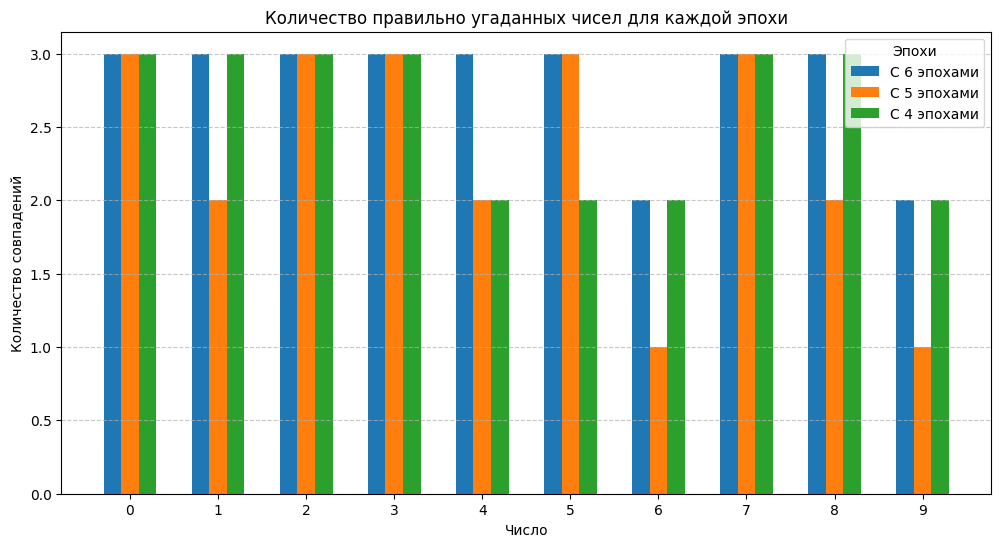

In [38]:
true_values = epochs['true']

# Подсчёт совпадений для каждого числа (0–9) по эпохам
correct_counts = {key: [0] * 10 for key in epochs.keys() if key != 'true'}

for key, values in epochs.items():
    if key != 'true':  # Пропускаем истинные значения
        for true, pred in zip(true_values, values):
            if true == pred:
                correct_counts[key][true] += 1

# Построение гистограммы
x = np.arange(10)  # Числа от 0 до 9
width = 0.2  # Ширина столбцов
offsets = [-width, 0, width]  # Смещения для эпох 4, 5 и 6

plt.figure(figsize=(12, 6))

for i, (key, counts) in enumerate(correct_counts.items()):
    plt.bar(x + offsets[i], counts, width, label=f'С {key} эпохами')

# Настройки графика
plt.title('Количество правильно угаданных чисел для каждой эпохи')
plt.xlabel('Число')
plt.ylabel('Количество совпадений')
plt.xticks(x)
plt.legend(title='Эпохи')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()